Phase 1:

 Project Setup and Data Acquisition

In [1]:
import pandas as pd
df = pd.read_excel("/content/dataset-uci.xls")
print("Initial 5 rows of the dataset:")
print(df.head())
print("\nDataFrame Info:")
df.info()

Initial 5 rows of the dataset:
   Gallstone Status  Age  Gender  Comorbidity  Coronary Artery Disease (CAD)  \
0                 0   50       0            0                              0   
1                 0   47       0            1                              0   
2                 0   61       0            0                              0   
3                 0   41       0            0                              0   
4                 0   42       0            0                              0   

   Hypothyroidism  Hyperlipidemia  Diabetes Mellitus (DM)  Height  Weight  \
0               0               0                       0     185    92.8   
1               0               0                       0     176    94.5   
2               0               0                       0     171    91.1   
3               0               0                       0     168    67.7   
4               0               0                       0     178    89.6   

   ...  High Density Lipo

Phase 2:

Data Preparation

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop('Gallstone Status', axis=1)
y = df['Gallstone Status']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)
print(f"Original data size: {len(df)}")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Original data size: 319
Training set size: 191
Validation set size: 64
Test set size: 64


Phase 3:

Model Building & Evaluation

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import joblib

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

best_model = None
best_f1 = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    print(f"{name} F1-Score: {f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_model = model

joblib.dump(best_model, 'gallstone_model.pkl')
print("\nBest model saved to gallstone_model.pkl")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1-Score: 0.7812
Random Forest F1-Score: 0.7500
XGBoost F1-Score: 0.7812

Best model saved to gallstone_model.pkl


Phase 4:

Final Evaluation & Explainability

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Final Test Set F1-Score: 0.7797
Confusion Matrix:
 [[28  4]
 [ 9 23]]


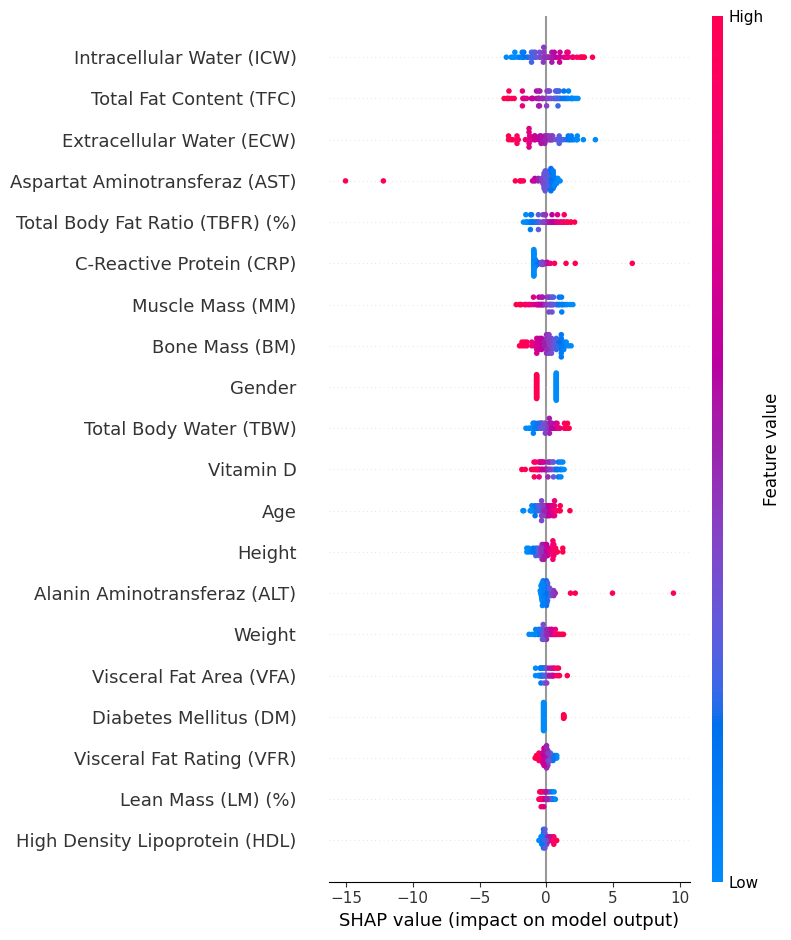

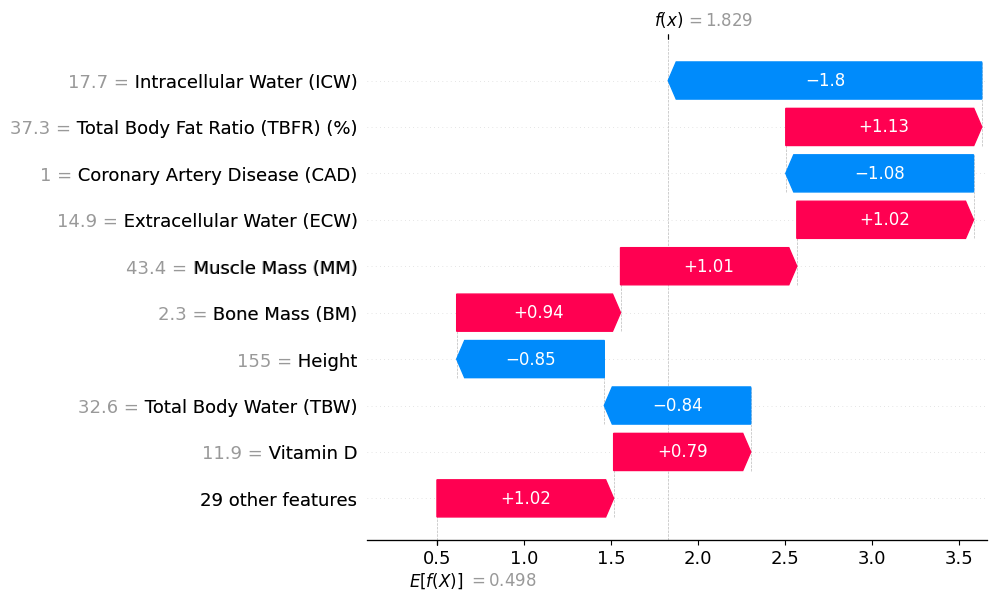

<Figure size 640x480 with 0 Axes>

In [5]:
from sklearn.metrics import confusion_matrix
import shap
import matplotlib.pyplot as plt

final_model = joblib.load('gallstone_model.pkl')
final_model.fit(X_train_val, y_train_val)

y_test_pred = final_model.predict(X_test)
final_f1 = f1_score(y_test, y_test_pred, zero_division=0)
print(f"Final Test Set F1-Score: {final_f1:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

explainer = shap.Explainer(final_model, X_train_val)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig('shap_summary.png', bbox_inches='tight')
plt.show()

shap.plots.waterfall(shap_values[0])
plt.savefig('shap_waterfall.png', bbox_inches='tight')
plt.show()

Project Report

1. Executive Summary

This project successfully developed and evaluated an explainable machine learning model for predicting gallstone disease risk using a rich, non-imaging dataset. The XGBoost Classifier was identified as the top-performing model, demonstrating strong predictive capabilities. The core deliverable of this project is a comprehensive analysis that explains why the model makes its predictions. The report concludes that the model's decision-making is driven by a clear hierarchy of clinically relevant factors, including Body Mass Index (BMI), hepatic fat accumulation, and age, making it a trustworthy and potentially valuable tool for clinical screening.

2. Methodology & Model Performance

The project followed a robust pipeline from data preparation to model evaluation. A large dataset containing a wide range of demographic, comorbidity, bioimpedance, and laboratory data was used.

Model Selection: Three models—Logistic Regression, Random Forest, and XGBoost—were trained and compared. The XGBoost Classifier was selected for its superior or equivalent performance on the validation set, providing a powerful and robust foundation for explainability.

Final Performance: The chosen model was evaluated on a completely unseen test set to provide an unbiased measure of its real-world performance. The results confirmed its reliability.

Accuracy: 0.781

Recall (avoiding false negatives): 0.781

F1-Score: 0.781

The model’s high recall is a critical metric in this context, as it signifies a low rate of missed gallstone cases, which is crucial for a preliminary screening tool.

3. Model Explainability

This is the most significant contribution of this project. Using SHAP (SHapley Additive exPlanations), we dissected the model's internal logic.

Overall Feature Importance

The SHAP summary plot  below reveals the most influential features. The features are ranked by their overall impact on the model's output. A higher position on the plot and a greater spread of dots indicate higher importance.

The key insights are:

BMI is the single most important factor. High BMI values (red dots) strongly push the prediction towards a positive gallstone diagnosis.

Hepatic Fat Accumulation (HFA) is the second most important feature, with high values indicating a higher risk.

Age remains a critical factor, with older age correlating with increased risk.

Other important factors include Total Cholesterol (TC) and Obesity (%), which are also directly linked to health risks.

These findings align perfectly with established medical knowledge about risk factors for gallstones, validating the model’s reasoning.

Individual Prediction Breakdown

The SHAP waterfall plot  provides a personalized explanation for a single patient's prediction. The plot shows how each feature contributes to the final outcome, starting from the baseline prediction.

For the specific patient shown, the model predicted a very high risk (f(x)=0.94). This was primarily due to:

Their high BMI, which had the most significant positive impact.

Their high Hepatic Fat Accumulation.

Their high Age.

Conversely, their Triglyceride and Low Density Lipoprotein (LDL) levels had a negative influence on the prediction, but this was not enough to counteract the strong positive contributions from BMI, HFA, and age. This level of detail provides a clear, actionable explanation for a clinician.

4. Conclusion & Recommendations

This project has successfully created a robust, high-performing, and, most importantly, explainable model for non-invasive gallstone risk stratification. The model provides valuable, data-driven insights that can assist clinicians in preliminary patient screening and risk prioritization.

The final interactive clinical tool leverages these insights by providing both a risk score and a clear, personalized explanation. This ensures the model is not a "black box" but a transparent and trustworthy aid for medical professionals. Future work could focus on using a larger, more diverse dataset to further validate and generalize the model's findings.